Name: Neel Gude 
<br>
Github Username: NPG1103
<br>
USC ID: 7948367922

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

Get the Cycle Power Plant Data Set

In [182]:
data = pd.read_excel(r'C:\Users\neelg\OneDrive\Desktop\CCPP\Folds5x2_pp.ods', engine='odf')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [186]:
N_rows = data.shape[0]
N_columns = data.shape[1]
print('Number of rows =', N_rows)
print('Number of columns =', N_columns)
print('Column labels are:')
for col in data.columns:
    print(col)

Number of rows = 9568
Number of columns = 5
Column labels are:
AT
V
AP
RH
PE


**The dataset contains 5 Columns and 9568 rows. The column labels ('AT', 'V', 'AP', 'RH', 'PE') represent Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity and Energy Output(Which is represented as 'PE' predicing net hourly electric energy output) respectively**

#### ii. pairwise scatterplots of all the varianbles

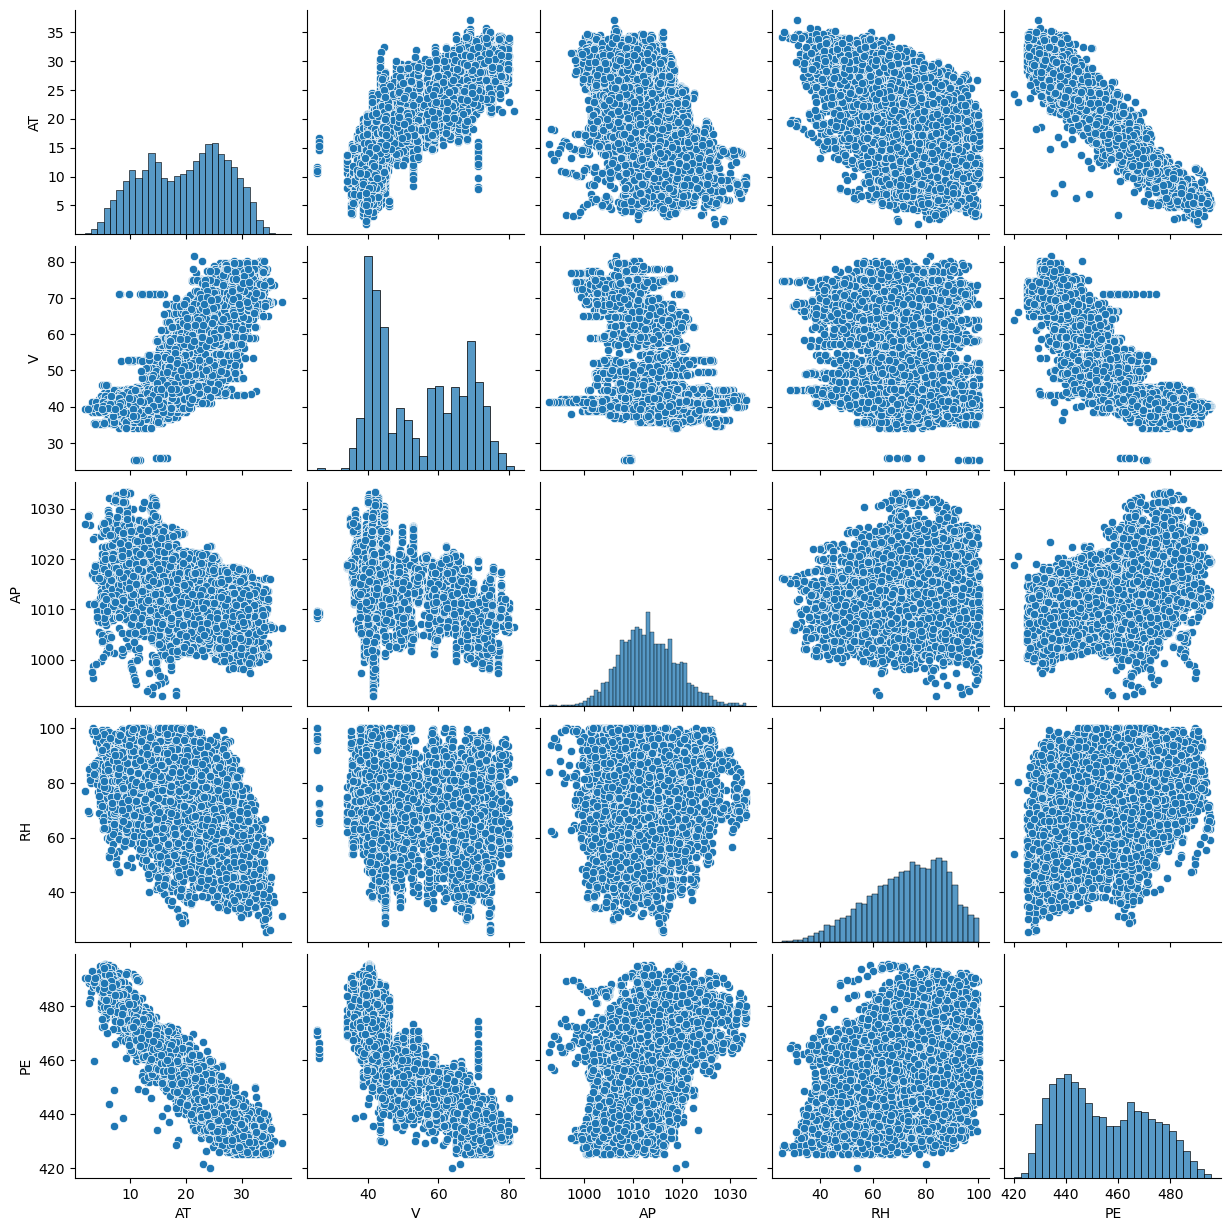

In [190]:
sns.pairplot(data)

  **1) PE vs AT and PE vs V has a negative linear relation as the temperature and vacuum increases.
  2) Both PE vs AT and PE vs V also have a slimmer scatterplot compared to the rest, indicating a stronger correlation.
  3) PE vs AP and PE vs RH have a much broader scatterplot in comparison and thus indicate a weaker correlation.**

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [194]:
stats = data.describe()
rang = data.max() - data.min()
iqr = data.quantile(0.75) - data.quantile(0.25)
print(stats)
print('\nRange')
print(rang)
print('\nIQR')
print(iqr)

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

Range
AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64

IQR
AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64


### (c) Simple Linear Regression


Regression results for predictor AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:03:38   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4

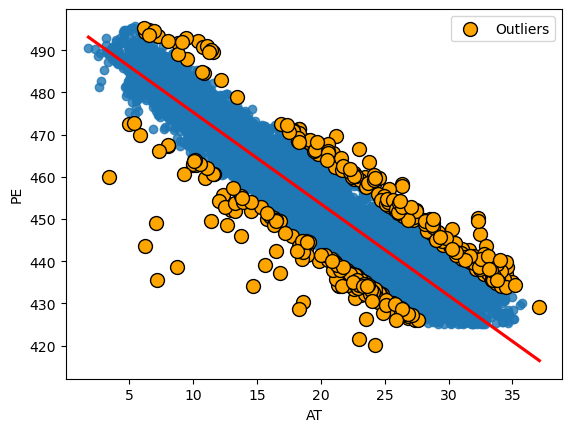


Regression results for predictor V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:03:39   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        51

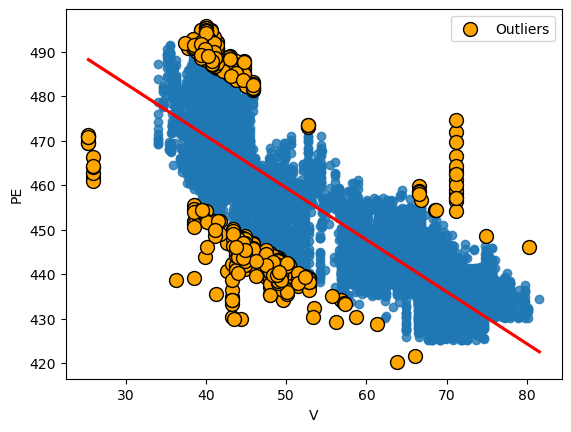


Regression results for predictor AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:03:40   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -10

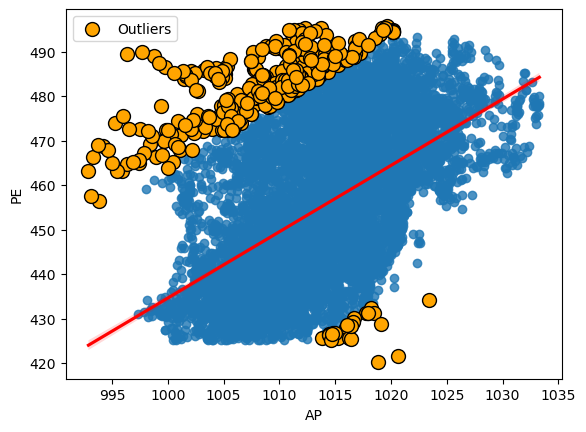


Regression results for predictor RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:03:40   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4

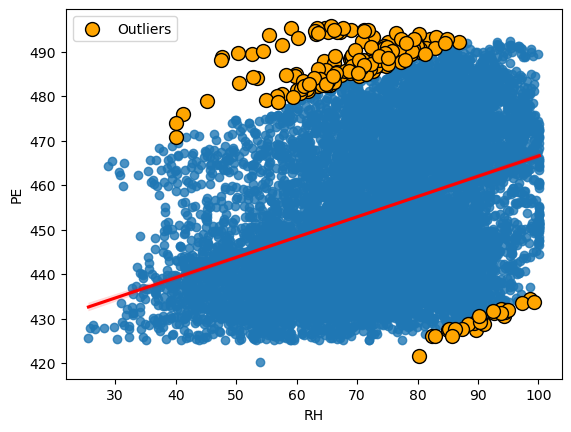

In [197]:
def simple_regression(data, calculator):
    X = sm.add_constant(data[calculator])
    y = data['PE']
    model = sm.OLS(y, X).fit()
    return model

for calculator in data.columns[:-1]:
    if calculator == 'PE':
        continue
    model = simple_regression(data, calculator)
    print(f"\nRegression results for predictor {calculator}:")
    print(model.summary())
    sns.regplot(x=calculator, y='PE', data=data, line_kws={"color": "red"})
    
    data['residuals'] = model.resid
    data['z_score'] = zscore(data['residuals'])
    
    outliers = data[abs(data['z_score']) > 2]
    plt.scatter(outliers[calculator], outliers['PE'], color='orange', edgecolor='k', s=100, label='Outliers')
    plt.legend()
    plt.show()



### (d) Multiple Regression

In [202]:
calculators = ['AT', 'V', 'AP', 'RH']
X = sm.add_constant(data[calculators])
Y = data['PE']
multi_model = sm.OLS(Y, X).fit()
print("\nMultiple Regression Results:")
print(multi_model.summary())


Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:03:53   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093 

**We observe that for all predictors, we can reject the null hypothesis as the p-values for all predictors is very small (< alpha = 0.05) and thus they are statistically significant for the regression model.**

### (e) 1c Compare to 1d

C:\Users\neelg\AppData\Local\Temp\ipykernel_24644\1686132808.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(Uni_coeffs[i], Multi_coeffs[i], calculator)


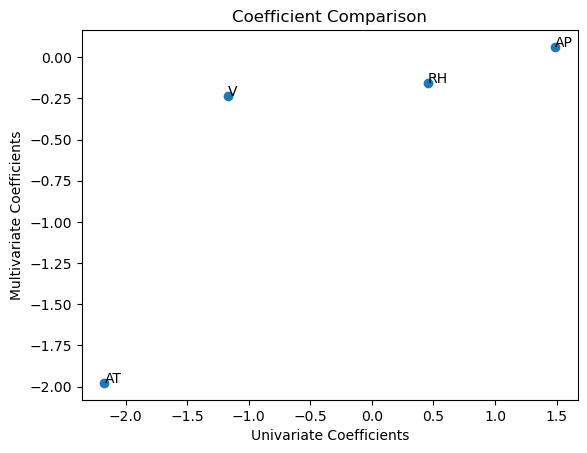

In [206]:
Uni_coeffs = [simple_regression(data, calculator).params[calculator] for calculator in calculators]
Multi_coeffs = multi_model.params[1:]

min_len = min(len(Uni_coeffs), len(Multi_coeffs))
plt.scatter(Uni_coeffs[:min_len], Multi_coeffs[:min_len])
for i, calculator in enumerate(data.columns[:min_len]):
    plt.text(Uni_coeffs[i], Multi_coeffs[i], calculator)
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multivariate Coefficients')
plt.title('Coefficient Comparison')
plt.show()


### (f) Nonlinear Association

In [253]:
def polynomial_regression(data, calculator):
    X = pd.DataFrame({'x': data[calculator]})
    for d in range(2, 4): 
        X[f'x{d}'] = data[calculator] ** d
    X = sm.add_constant(X)
    Y = data['PE']
    model = sm.OLS(Y, X).fit()
    return model

for calculator in data.columns[:-1]:
    poly_model = polynomial_regression(data, calculator)
    print(f"\nNonlinear regression for {calculator}:")
    print(poly_model.summary())


Nonlinear regression for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:13:59   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281 

1) There is a strong evidence of a nonlinear relationship with AT as both the x^2 and x^3 coefficient:p = 0.000 which is statistically significant.
2) There is a weak evidence of a nonlinear relationship with V as the x^2 coefficient:p = 0.991 which is statistically non significant, but there is some nonlinearity as x^3 coefficient:p = 0.009 which is statistically significant.
3) There is a no evidence of a nonlinear relationship with AP as the x^2 and x^3 coefficient:p = 0.989 and 0.988 respectively which is statistically insignificant.
4) There is a some evidence of a nonlinearity relationship with RH as the x^2 coefficient:p = 0.000 which is statistically significant but the x^3 coefficient:p = 0.099 which is marginally statistically significant.


### (g) Interactions of Predictors

In [213]:
X = data[["AT", "V", "AP", "RH"]]
Features = PolynomialFeatures(interaction_only = True)
interactions = Features.fit_transform(X)
model = sm.OLS(data['PE'], interactions).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:04:21   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

The significant interaction terms are:
1) x5 : AT * V -> p = 0.000
2) x7 : AT * RH -> p = 0.000
3) x8 : V * AP -> p = 0.000
4) x10 : AP * RH -> p = 0.034

### (h) Improvement

In [220]:
calculators = ['AT', 'V', 'AP', 'RH']
train, test = train_test_split(data, test_size=0.3, random_state=42)
y_train = train['PE']
y_test = test['PE']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train[calculators])
X_test_poly  = poly.transform(test[calculators])
feature_names = poly.get_feature_names_out(calculators)

X_train_poly_data = pd.DataFrame(X_train_poly, columns=feature_names, index=train.index)
X_test_poly_data  = pd.DataFrame(X_test_poly, columns=feature_names, index=test.index)

X_train_poly_data_const = sm.add_constant(X_train_poly_data)
X_test_poly_data_const  = sm.add_constant(X_test_poly_data)

poly_model = sm.OLS(y_train, X_train_poly_data_const).fit()

train_preds_poly = poly_model.predict(X_train_poly_data_const)
test_preds_poly  = poly_model.predict(X_test_poly_data_const)
train_mse_poly = mean_squared_error(y_train, train_preds_poly)
test_mse_poly  = mean_squared_error(y_test, test_preds_poly)

print(poly_model.summary())
print(f"Train MSE: {train_mse_full:.4f}")
print(f"Test  MSE: {test_mse_full:.4f}\n")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:08:42   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

In [222]:
train_reduced = train.copy()
test_reduced = test.copy()

for df in [train_reduced, test_reduced]:
    df['AT^2'] = df['AT'] ** 2
    df['AP^2'] = df['AP'] ** 2
    df['RH^2'] = df['RH'] ** 2
    df['AT_RH'] = df['AT'] * df['RH']
    df['AP_RH'] = df['AP'] * df['RH']

features_reduced = ['AT', 'AP', 'RH', 'AT^2', 'AP^2', 'RH^2', 'AT_RH', 'AP_RH']

X_train_red = sm.add_constant(train_reduced[features_reduced])
X_test_red  = sm.add_constant(test_reduced[features_reduced])
y_train = train_reduced['PE']
y_test  = test_reduced['PE']

reduced_model = sm.OLS(y_train, X_train_red).fit()

train_preds_red = reduced_model.predict(X_train_red)
test_preds_red  = reduced_model.predict(X_test_red)
train_mse_red = mean_squared_error(y_train, train_preds_red)
test_mse_red  = mean_squared_error(y_test, test_preds_red)

print(reduced_model.summary())
print(f"Train MSE: {train_mse_red:.4f}")
print(f"Test MSE: {test_mse_red:.4f}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:08:46   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6688   BIC:                         3.946e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7534.3294   1175.894     -6.407      0.0

### (i) KNN

Best k (raw features): 5
Best k (normalized features): 4
Best Test error for k(raw): 15.726819842563568
Best Test error for k(norm): 14.305669422675024


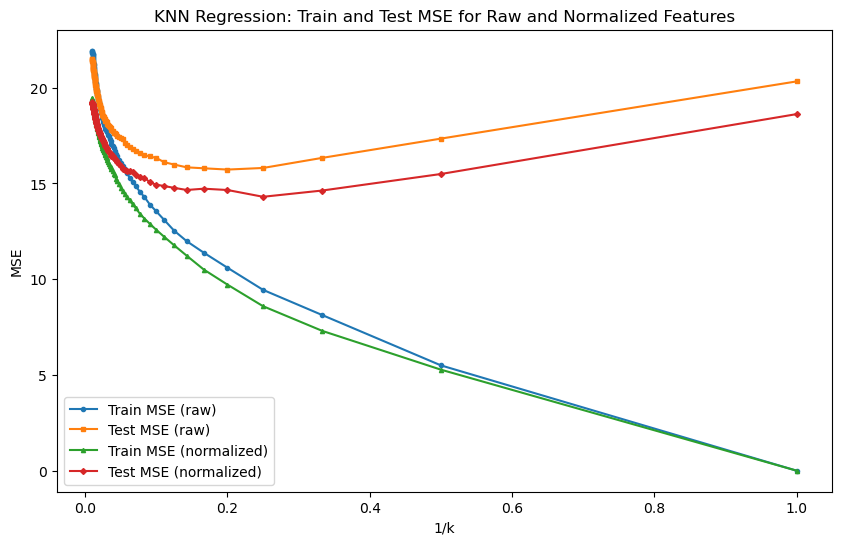

In [227]:
X_train_raw = train[calculators]
X_test_raw  = test[calculators]

scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train_raw), columns=calculators, index=X_train_raw.index)
X_test_norm  = pd.DataFrame(scaler.transform(X_test_raw), columns=calculators, index=X_test_raw.index)

k_values = range(1, 101)
train_mse_raw = []
test_mse_raw  = []
train_mse_norm = []
test_mse_norm  = []

for k in k_values:
    knn_1 = KNeighborsRegressor(n_neighbors=k)
    knn_1.fit(X_train_raw, y_train)
    train_pred_raw = knn_1.predict(X_train_raw)
    test_pred_raw  = knn_1.predict(X_test_raw)
    train_mse_raw.append(mean_squared_error(y_train, train_pred_raw))
    test_mse_raw.append(mean_squared_error(y_test, test_pred_raw))
    
    knn_2 = KNeighborsRegressor(n_neighbors=k)
    knn_2.fit(X_train_norm, y_train)
    train_pred_norm = knn_2.predict(X_train_norm)
    test_pred_norm  = knn_2.predict(X_test_norm)
    train_mse_norm.append(mean_squared_error(y_train, train_pred_norm))
    test_mse_norm.append(mean_squared_error(y_test, test_pred_norm))

best_k_raw = k_values[np.argmin(test_mse_raw)]
best_k_norm = k_values[np.argmin(test_mse_norm)]
print("Best k (raw features):", best_k_raw)
print("Best k (normalized features):", best_k_norm)
print("Best Test error for k(raw):", min(test_mse_raw))
print("Best Test error for k(norm):", min(test_mse_norm))

plt.figure(figsize=(10, 6))
plt.plot([1/k for k in k_values], train_mse_raw, label='Train MSE (raw)', marker='o', markersize=3)
plt.plot([1/k for k in k_values], test_mse_raw,  label='Test MSE (raw)',  marker='s', markersize=3)
plt.plot([1/k for k in k_values], train_mse_norm, label='Train MSE (normalized)', marker='^', markersize=3)
plt.plot([1/k for k in k_values], test_mse_norm,  label='Test MSE (normalized)',  marker='D', markersize=3)

plt.xlabel("1/k")
plt.ylabel("MSE")
plt.title("KNN Regression: Train and Test MSE for Raw and Normalized Features")
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [228]:
print("Linear Regression Test MSE (Improved):", test_mse_red)
print("KNN Regression Test MSE (Normalized):", min(test_mse_norm))

if test_mse_red < min(test_mse_norm):
    print("Linear regression with interaction terms performs better.")
else:
    print("KNN regression with normalized features performs better.")

Linear Regression Test MSE (Improved): 22.18454411256878
KNN Regression Test MSE (Normalized): 14.305669422675024
KNN regression with normalized features performs better.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

A flexible model will perform better as the size of n is extremely large and that of p is small, thus there wont be any overfitting

### (b) The number of predictors p is extremely large, and the number of observations n is small.

A flexible model would be worse here, as when p is large and n is small there will be overfitting if flexible models are used as there will be more paramaters to take into account than the observations, making test data challenging to categorize.

### (c) The relationship between the predictors and response is highly non-linear.

A flexible model will be better here as flexible models like neural networks for example can capture more nonlinear complex relationships than a common linear regression model

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

A flexible model will perform worse here as high variance can make flexible models capture irrelevant data such as outliers and noise instead of the actual relationship resulting in high variance in predictions

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

# K-Nearest Neighbors Analysis

---

## (a) Compute the Euclidean Distance

1. **Obs 1 (0, 3, 0)**  
\[
\sqrt{(0-0)^2 + (3-0)^2 + (0-0)^2} = \sqrt{0 + 9 + 0} = \sqrt{9} = **3**
\]

2. **Obs 2 (2, 0, 0)**  
\[
\sqrt{(2-0)^2 + (0-0)^2 + (0-0)^2} = \sqrt{4 + 0 + 0} = \sqrt{4} = **2**
\]

3. **Obs 3 (0, 1, 3)**  
\[
\sqrt{(0-0)^2 + (1-0)^2 + (3-0)^2} = \sqrt{0 + 1 + 9} = \sqrt{10} **approx 3.16**
\]

4. **Obs 4 (0, 1, 2)**  
\[
\sqrt{(0-0)^2 + (1-0)^2 + (2-0)^2} = \sqrt{0 + 1 + 4} = \sqrt{5} **approx 2.24**
\]

5. **Obs 5 (-1, 0, 1)**  
\[
\sqrt{(-1-0)^2 + (0-0)^2 + (1-0)^2} = \sqrt{1 + 0 + 1} = \sqrt{2} **approx 1.41**
\]

6. **Obs 6 (1, 1, 1)**  
\[
\sqrt{(1-0)^2 + (1-0)^2 + (1-0)^2} = \sqrt{1 + 1 + 1} = \sqrt{3} **approx 1.73**
\]


### (b) What is our prediction with K = 1? Why?

The prediction for K=1 is Green because for k=1, the closest observation is number 5 which has class Green

### (c) What is our prediction with K = 3? Why?

The prediction for K=3 is Red, when k=3 the 3 closest points are observation number 5, 6 and 2 which are Green, Red and Red respectively, so as Red has majority it is Red

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

The k value will be small as when k increases the boundary will become more linear, so when the boundary is highly nonlinear then k will be small

### References

1. https://note.nkmk.me/en/python-pandas-len-shape-size/
2. https://www.atlassian.com/data/charts/what-is-a-scatter-plot
3. https://www.w3schools.com/python/pandas/ref_df_describe.asp
4. https://www.w3schools.com/python/python_ml_multiple_regression.asp
5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

**Also took help from stackoverflow, geeksforgeeks, ISLR and used chatGpt as a copilot to help me with the errors I made**